In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
import xgboost
from matplotlib import pyplot
import graphviz

from sklearn.preprocessing import RobustScaler, Imputer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

/home/brennan/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

ids = test['PassengerId']

In [3]:
train = train.drop(['Ticket','Cabin', 'PassengerId', 'Name'], axis=1)
test = test.drop(['Ticket','Cabin', 'PassengerId', 'Name'], axis=1)

train['sex_f'] = np.where(train['Sex'] == 'female', 1, 0)
test['sex_f'] = np.where(test['Sex'] == 'female', 1, 0)

In [4]:
embarked_dum = pd.get_dummies(train['Embarked'], prefix='Embarked')
embarked_dum2 = pd.get_dummies(test['Embarked'], prefix='Embarked')

In [5]:
train = train.drop(['Embarked','Sex'], axis=1)
test = test.drop(['Embarked','Sex'], axis=1)

In [6]:
train = pd.concat([train, embarked_dum], axis=1)
test = pd.concat([test, embarked_dum2], axis=1)

In [7]:
X = train[[c for c in train if 'Survived' not in c]]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [8]:
preprocessing = Pipeline([
    ('impute', Imputer(missing_values='NaN', strategy='mean', axis=0)),
    ('scale', StandardScaler())
])


In [9]:
X_train_sc = preprocessing.fit_transform(X_train)
X_test_sc = preprocessing.transform(X_test)
test = preprocessing.transform(test)

In [33]:
model = xgboost.XGBClassifier(learning_rate=0.09, 
                              max_depth=15,
                              subsample=0.5,
                              colsample_bytree=0.5,
                              seed=1,
                              nthread=4,
                              n_estimators=100
                             )
model.fit(X_train_sc, y_train)
model.score(X_test_sc, y_test)

0.84916201117318435

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f8ab1c0b7f0>>

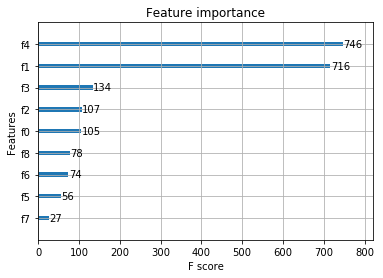

In [34]:
xgboost.plot_importance(booster=model).plot

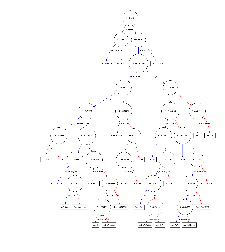

In [35]:
xgboost.plot_tree(booster=model)

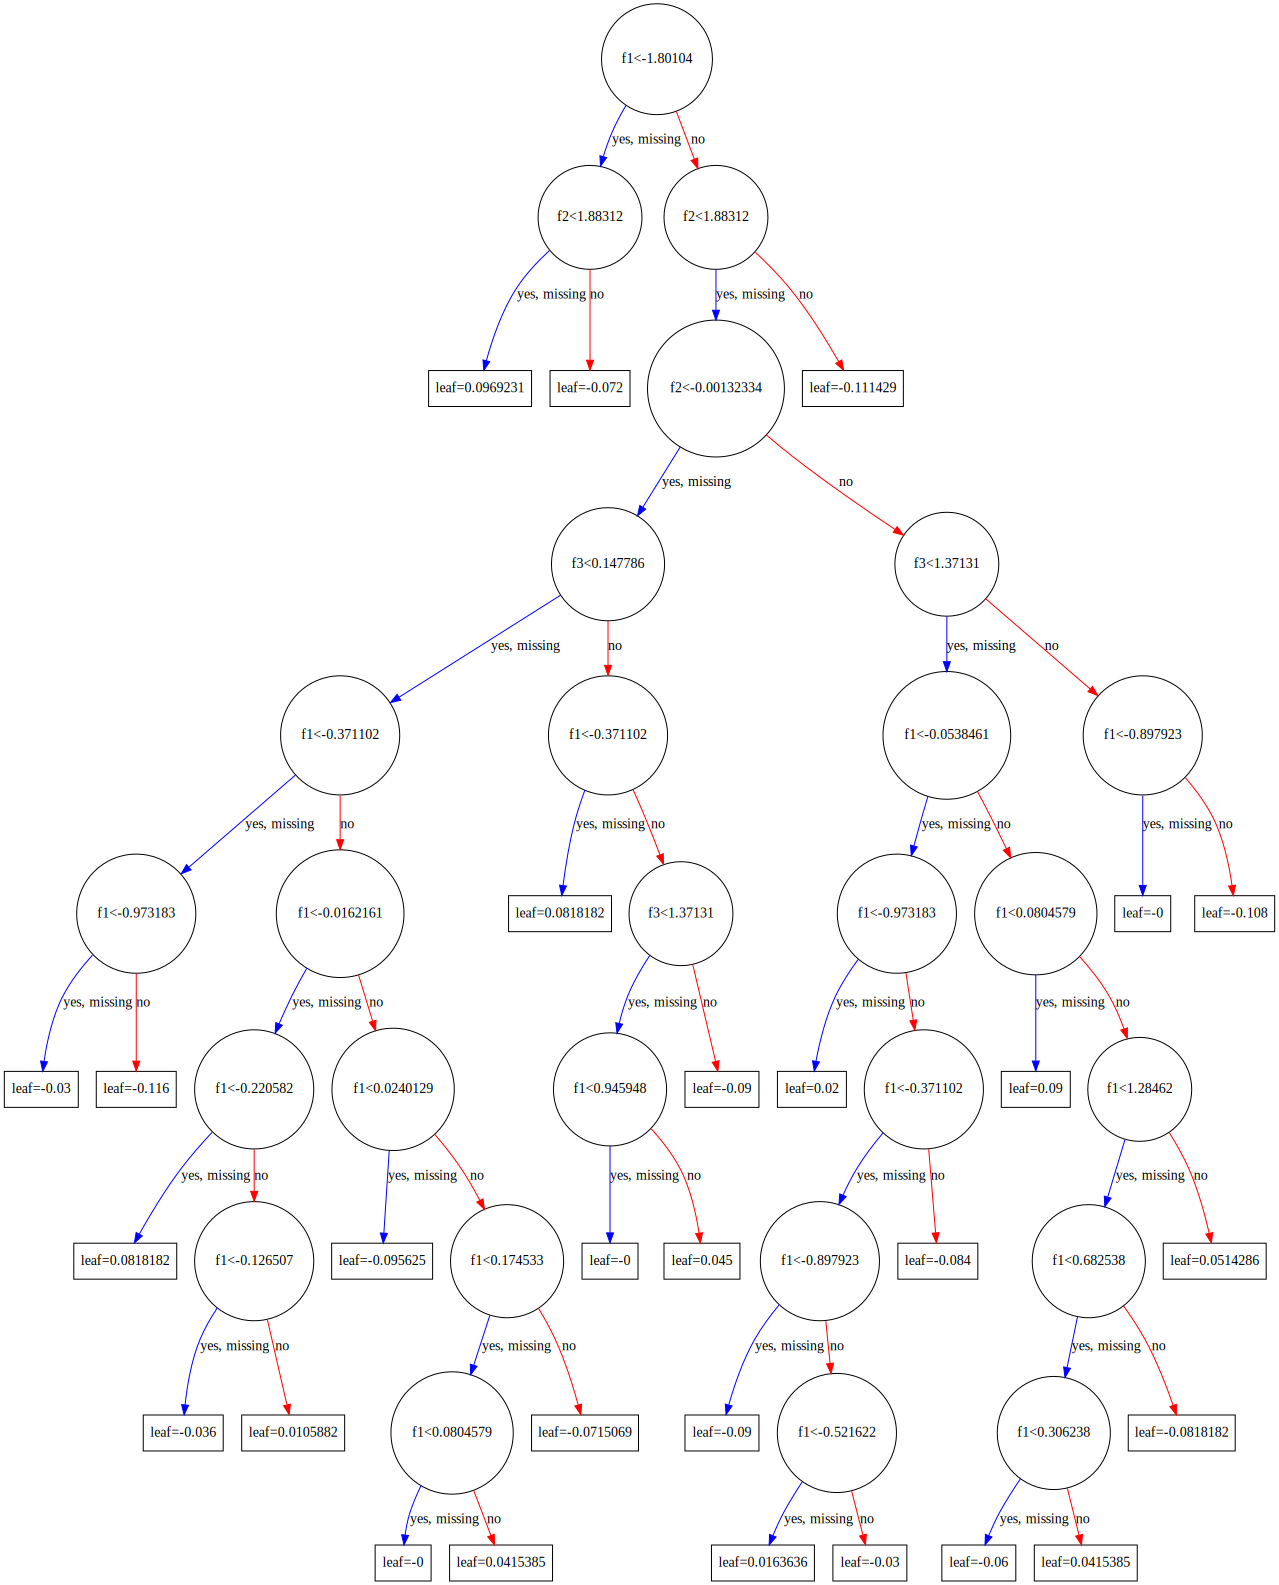

In [36]:
xgboost.to_graphviz(booster=model)

In [37]:
predictions = model.predict(test)

In [38]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
print(output.head())
len(output)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


418